<a href="https://colab.research.google.com/github/Fcazarez/RRC3_UML_Ass5_Autoencoders/blob/main/UML_Ass5_Autoencoders_0378585_Felix_Cazarez.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Unsupervised Machine Learning**
# **Assignement 5: Autoencoders**
## **Felix Cazarez**



### **Objective:**
To store a set of images using a minimal amount of data.

### **Data:**
Obtained from Arabic Handwritten Digits Dataset | Kaggle , original source unknown.
https://www.kaggle.com/datasets/mloey1/ahdd1


### **Problem Statement:**
You are working with a team that is developing a mobile app for doing arithmetic by hand, in Arabic. The app will recognize digits in the user's handwriting as part of its functionality. In order to use a minimum amount of data, your job as a developer is to store each hand-drawn digit using as little memory as possible. Using a dataset of hand drawn Arabic digits, you will train an autoencoder to encode and decode these images.

### **Arabic Digits:**
Arabic digits correspond to Roman digits according to the table below (N.Das, A. Mollah, S. Saha, S. Haque, 2010, https://arxiv.org/abs/1003.1891):



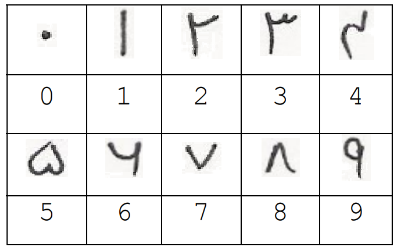

# **1. Data**
**a)** Each row of csvImages 10k x 784.csv contains the gray scale values of a 28 x 28 image.
* Load this data into a pandas dataframe.
* Convert the dataframe to a numpy array using pandas.values.
* Print the shape of the data.






In [42]:
# Importing needed libraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

from keras.models import Model
from keras.layers import Input
from keras.optimizers import Adam

from tensorflow.keras.layers import Dense, Input, Flatten,\
                                    Reshape, LeakyReLU as LR,\
                                    Activation, Dropout
from tensorflow.keras.models import Model, Sequential
import tensorflow.python.util.deprecation as deprecation
deprecation._PRINT_DEPRECATION_WARNINGS = False

In [43]:
url = 'https://raw.githubusercontent.com/Fcazarez/RRC3_UML_Ass5_Autoencoders/main/csvTestImages%2010k%20x%20784.csv'
dataframe_df = pd.read_csv(url)
print(dataframe_df.head())
print('=='*30)
print("Shape of the dataframe: ", dataframe_df.shape)

   0  0.1  0.2  0.3  0.4  0.5  0.6  0.7  0.8  0.9  ...  0.538  0.539  0.540  \
0  0    0    0    0    0    0    0    0    0    0  ...      0      0      0   
1  0    0    0    0    0    0    0    0    0    0  ...      0      0      0   
2  0    0    0    0    0    0    0    0    0    0  ...      0      0      0   
3  0    0    0    0    0    0    0    0    0    0  ...      0      0      0   
4  0    0    0    0    0    0    0    0    0    0  ...      0      0      0   

   0.541  0.542  0.543  0.544  0.545  0.546  0.547  
0      0      0      0      0      0      0      0  
1      0      0      0      0      0      0      0  
2      0      0      0      0      0      0      0  
3      0      0      0      0      0      0      0  
4      0      0      0      0      0      0      0  

[5 rows x 784 columns]
Shape of the dataframe:  (9999, 784)


In [44]:
# Convert the DataFrame to a NumPy array
data_np = dataframe_df.values

print(data_np)
print('=='*30)
print("Shape of the NumPy array: ", data_np.shape)


[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
Shape of the NumPy array:  (9999, 784)


**b)** Normalize by dividing each value by 255. In order to display the images, reshape the array so each image is 28 x 28 using numpy.ndarray.reshape.
* Use matplotlib.plot.imshow and matplotlib.plot.subplot to give a plot of the first five images using the 'gray' colour map.
* In order to put the data back in the original shape for input to the neural network, reshape each image to be 784 (one-dimensional).

In [45]:
# Normalize the values by dividing each element by 255
data_np_normalized = data_np / 255.0

In [46]:
data_np_reshaped1 = data_np_normalized.reshape(-1, 28*2)
# Reshape the array to make each image 28 x 28
print("Shape of the reshaped array: ", data_np_reshaped1.shape)

Shape of the reshaped array:  (139986, 56)


In [47]:
data_np_reshaped = data_np_reshaped1.reshape(-1, 28,28)
#data_np_reshaped2 = data_np_reshaped.reshape(-1, 28, 28)
print("Shape of the reshaped array: ", data_np_reshaped.shape)

Shape of the reshaped array:  (9999, 28, 28)


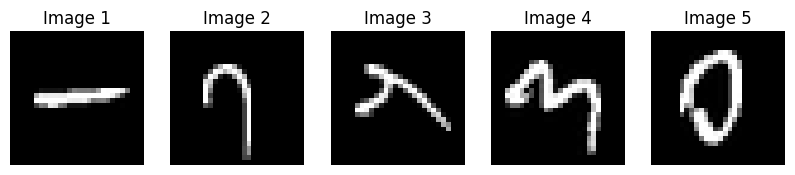

In [48]:
# Plot the first five images using 'gray' colormap
fig, axes = plt.subplots(1, 5, figsize=(10, 5))

for i in range(5):
    axes[i].imshow(data_np_reshaped[i], cmap='gray')
    axes[i].set_title(f"Image {i+1}")
    axes[i].axis('off')

plt.show()

In [49]:
data = data_np_reshaped.reshape((-1, 28*2))
data.shape

(139986, 56)

In [50]:
# Reshape each image to be one-dimensional (784 elements)
#flattened_images = data_np_reshaped.reshape(-1, 784)
#flattened_images.shape

# **2. Modeling**
**a)** Use keras.layers to create an input layer that matches the dimensions of your data.

**b)** Use keras.layers to create an encoding stage that has at least two layers and reduces the size of the data to 50% or less (less is better). You will need to choose activation functions.

**c)** Use keras.layers to create a decoding stage that has at least two layers and restores the data to its original size. You will need to choose activation functions.

**d)** Compile the complete autoencoder network. You will need to choose a loss function and an optimizer. Train the autoencoder using the image data.

**e)** Compile an encoder network from your trained input layer and encoding stage.



In [53]:
input_layer = Input(shape=28*2)
encoder_layer1 = Dense(588, activation='relu')(input_layer)
encoder_layer2 = Dense(464, activation='relu')(encoder_layer1)
encoder_stage = Dense(392, activation='relu')(encoder_layer2)
decoder_layer1 = Dense(464, activation='relu')(encoder_stage)
decoder_layer2 = Dense(512, activation='relu')(decoder_layer1)
decoding_stage = Dense(28 * 2, activation='sigmoid')(decoder_layer2)
# Create the autoencoder model
autoencoder = Model(input_layer, decoding_stage)
# Compile the autoencoder model
autoencoder.compile(optimizer=Adam(learning_rate=0.001), loss='mean_squared_error')
#autoencoder.compile(loss='binary_crossentropy',optimizer='adadelta')

In [54]:
autoencoder.fit(data, data, epochs=10)

Epoch 1/10
4375/4375 [==============================] - 72s 16ms/step - loss: 0.0088
Epoch 2/10
4375/4375 [==============================] - 69s 16ms/step - loss: 0.0016
Epoch 3/10
4375/4375 [==============================] - 71s 16ms/step - loss: 0.0013
Epoch 4/10
4375/4375 [==============================] - 69s 16ms/step - loss: 0.0012
Epoch 5/10
4375/4375 [==============================] - 67s 15ms/step - loss: 0.0011
Epoch 6/10
4375/4375 [==============================] - 66s 15ms/step - loss: 9.7135e-04
Epoch 7/10
4375/4375 [==============================] - 66s 15ms/step - loss: 9.1103e-04
Epoch 8/10
4375/4375 [==============================] - 66s 15ms/step - loss: 8.5770e-04
Epoch 9/10
4375/4375 [==============================] - 67s 15ms/step - loss: 8.1065e-04
Epoch 10/10
4375/4375 [==============================] - 67s 15ms/step - loss: 7.6524e-04


# **Conclusions**
**a)** Use matplotlib.plot.imshow and matplotlib.plot.subplot and your trained models to give a plot of the first five original images along the top row, the encoded versions of those same images along the second row, and the decoded versions along the bottom row. Return to question 2 and adjust the hyperparameters of your model until you are able to produce decoded images that represent the original images, with an encoding that uses as little data as possible; make a record of the adjustments you try in markdown.

**b)** Use markdown to describe how well the autoencoder is working, making reference to the plots.

**c)** State the amount of data needed to store a single image, considering that a floating-point number is 4 bytes of data. Calculate how much memory will be saved as a percentage.

In [55]:

encoder_output = Model(input_layer, encoder_stage).predict(data)
decoder_output = autoencoder.predict(data)

4375/4375 [==============================] - 21s 5ms/step


In [56]:
encoder_output = encoder_output.reshape((-1, 14, 14)) * 255
decoder_output = decoder_output.reshape((-1, 28, 28)) * 255

data = data.reshape((-1,28,28))

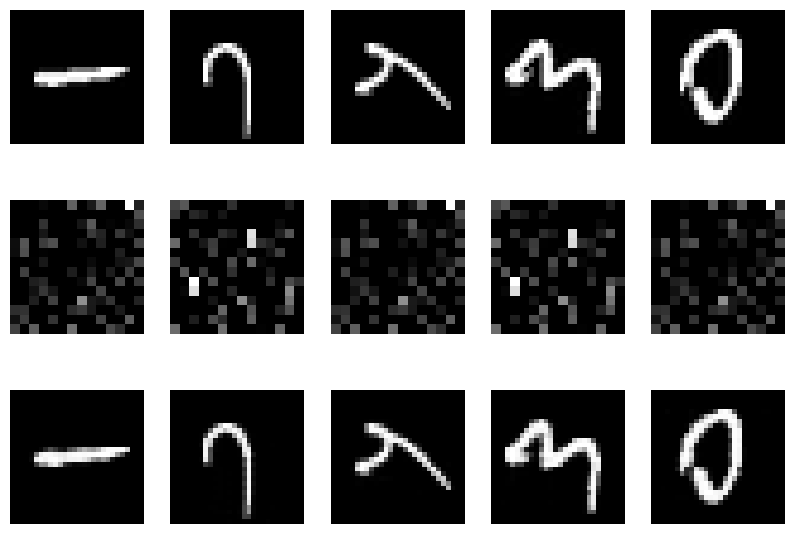

In [57]:
plt.figure(figsize=(10, 7))
for i in range(5):
    # Plot original images
    plt.subplot(3, 5, i + 1)
    plt.imshow(data[i], cmap='gray')
    plt.axis('off')
    # Plot encoder output
    plt.subplot(3, 5, i + 6)
    plt.imshow(encoder_output[i], cmap='gray')
    plt.axis('off')
    # Plot decoder output
    plt.subplot(3, 5, i + 11)
    plt.imshow(decoder_output[i], cmap='gray')
    plt.axis('off')

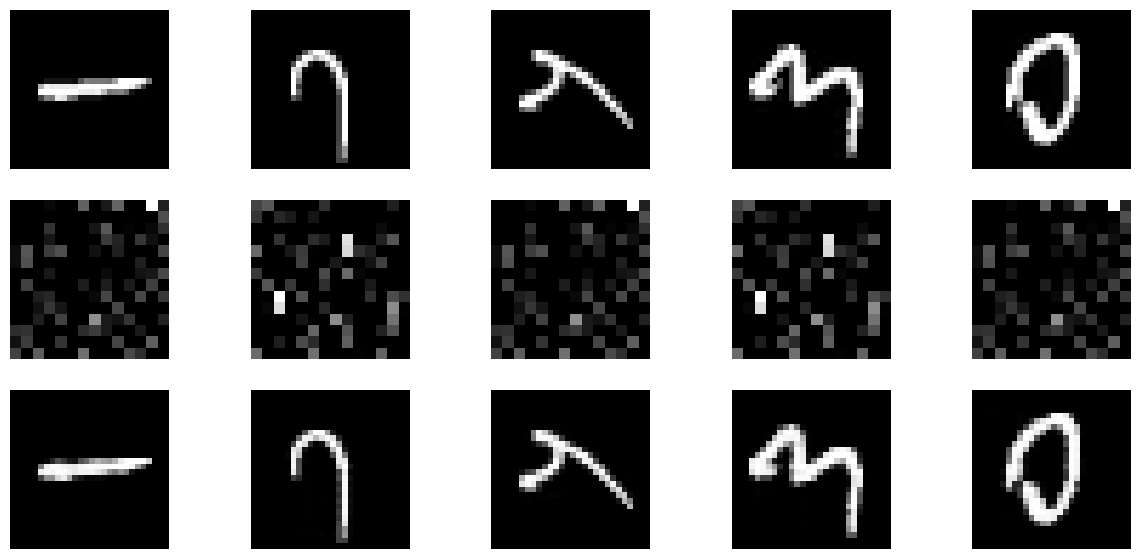

In [58]:
import matplotlib.pyplot as plt

fig, axes = plt.subplots(3, 5, figsize=(15, 7))

for i in range(5):
    # Plot original images
    axes[0, i].imshow(data[i], cmap='gray')
    axes[0, i].axis('off')

    # Plot encoder output
    axes[1, i].imshow(encoder_output[i], cmap='gray')
    axes[1, i].axis('off')

    # Plot decoder output
    axes[2, i].imshow(decoder_output[i], cmap='gray')
    axes[2, i].axis('off')

plt.show()
